<a href="https://colab.research.google.com/github/singhsikarwaryash/Data-Analysis-Projects/blob/main/Uber-Data/Untitled6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [ ]:
files= os.listdir(r'/content/drive/MyDrive/uber-pickups-in-new-york-city')
files


['Uber-Jan-Feb-FOIL.csv',
 'uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-janjune-15.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [ ]:
files.remove('Uber-Jan-Feb-FOIL.csv')
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-janjune-15.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [ ]:
path=r'/content/drive/MyDrive/uber-pickups-in-new-york-city'
final=pd.DataFrame()
for file in files:
    df=pd.read_csv(path+"/"+file,encoding='utf-8')
    final=pd.concat([final,df])

In [ ]:
final.shape

(18804806, 8)

In [ ]:
df=final.copy()

In [ ]:
df.head()

,Date/Time,Lat,Lon,Base,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512,NaN,NaN,NaN,NaN
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512,NaN,NaN,NaN,NaN
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512,NaN,NaN,NaN,NaN
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512,NaN,NaN,NaN,NaN
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512,NaN,NaN,NaN,NaN


In [ ]:
df.dtypes

Date/Time                object
Lat                     float64
Lon                     float64
Base                     object
Dispatching_base_num     object
Pickup_date              object
Affiliated_base_num      object
locationID              float64
dtype: object

In [ ]:
df['Date/Time']=pd.to_datetime(df['Date/Time'],format='%m/%d/%Y %H:%M:%S')

In [ ]:
df.dtypes

Date/Time               datetime64[ns]
Lat                            float64
Lon                            float64
Base                            object
Dispatching_base_num            object
Pickup_date                     object
Affiliated_base_num             object
locationID                     float64
dtype: object

In [ ]:
df.head()

,Date/Time,Lat,Lon,Base,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,NaN,NaN,NaN,NaN
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,NaN,NaN,NaN,NaN
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,NaN,NaN,NaN,NaN
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,NaN,NaN,NaN,NaN
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,NaN,NaN,NaN,NaN


In [ ]:
df['weekday']=df['Date/Time'].dt.day_name()

In [ ]:
df['day']=df['Date/Time'].dt.day
df['minute']=df['Date/Time'].dt.minute
df['month']=df['Date/Time'].dt.month
df['hour']=df['Date/Time'].dt.hour

In [ ]:
df.head()

,Date/Time,Lat,Lon,Base,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,weekday,day,minute,month,hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,NaN,NaN,NaN,NaN,Tuesday,1.0,11.0,4.0,0.0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,NaN,NaN,NaN,NaN,Tuesday,1.0,17.0,4.0,0.0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,NaN,NaN,NaN,NaN,Tuesday,1.0,21.0,4.0,0.0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,NaN,NaN,NaN,NaN,Tuesday,1.0,28.0,4.0,0.0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,NaN,NaN,NaN,NaN,Tuesday,1.0,33.0,4.0,0.0


In [ ]:
import plotly.express as px

In [ ]:
px.bar(x=df['weekday'].value_counts().index,
       y=df['weekday'].value_counts()
       )

In [ ]:
df['weekday'].value_counts().index

Index(['Thursday', 'Friday', 'Wednesday', 'Tuesday', 'Saturday', 'Monday',
       'Sunday'],
      dtype='object')

(array([216928., 103517., 227152., 543565., 324851., 366329., 819491.,
        660869., 579117., 692508.]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <a list of 10 Patch objects>)

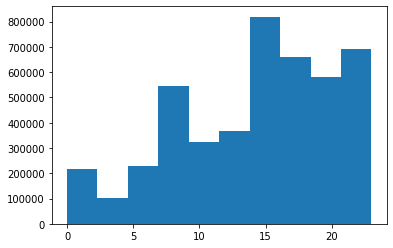

In [ ]:
plt.hist(df['hour'])

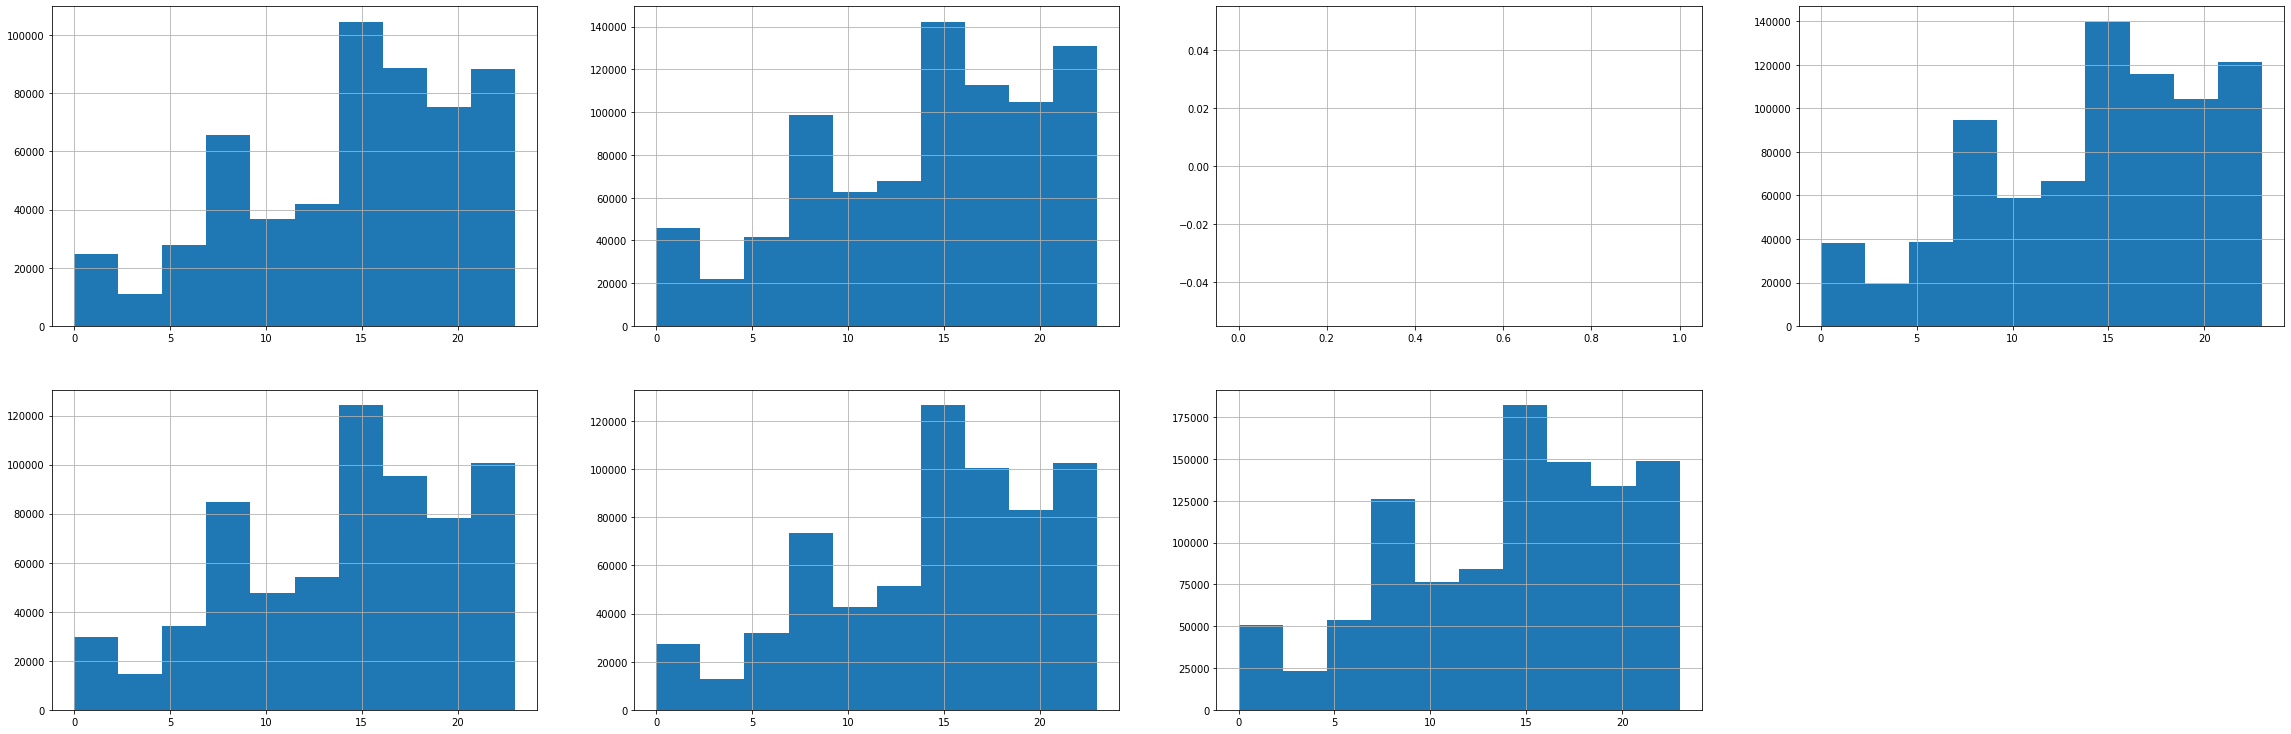

In [ ]:
plt.figure(figsize=(40,20))
for i,month in enumerate(df['month'].unique()):
  plt.subplot(3,4,i+1)
  df[df['month']==month]['hour'].hist()


In [ ]:
df.head()

,Date/Time,Lat,Lon,Base,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,weekday,day,minute,month,hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,NaN,NaN,NaN,NaN,Tuesday,1.0,11.0,4.0,0.0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,NaN,NaN,NaN,NaN,Tuesday,1.0,17.0,4.0,0.0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,NaN,NaN,NaN,NaN,Tuesday,1.0,21.0,4.0,0.0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,NaN,NaN,NaN,NaN,Tuesday,1.0,28.0,4.0,0.0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,NaN,NaN,NaN,NaN,Tuesday,1.0,33.0,4.0,0.0


In [ ]:
!pip install chart-studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 3.7 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=9c0f78ea3661f4b02a6f2ec18cb81ad1145566d5b25b24e2076c0b4f5c088db6
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [ ]:

import chart_studio.plotly as py
# import plotly.graph_objs as graph_objs
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

In [ ]:
df.groupby('month')['hour'].count()

month
4.0     564516
5.0     652435
6.0     663844
7.0     796121
8.0     829275
9.0    1028136
Name: hour, dtype: int64

In [ ]:
trace1=go.Bar(
    x=df.groupby('month')['hour'].count().index,
    y=df.groupby('month')['hour'].count(),
    name='Priority'
)

In [ ]:
iplot([trace1])

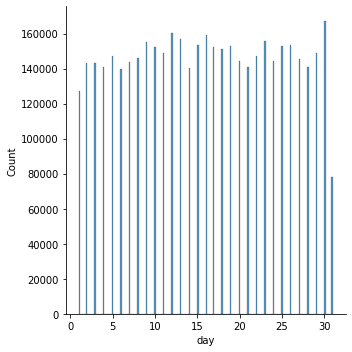

In [ ]:
sns.displot(df['day'])

Text(0.5, 1.0, 'Journeis of month day')

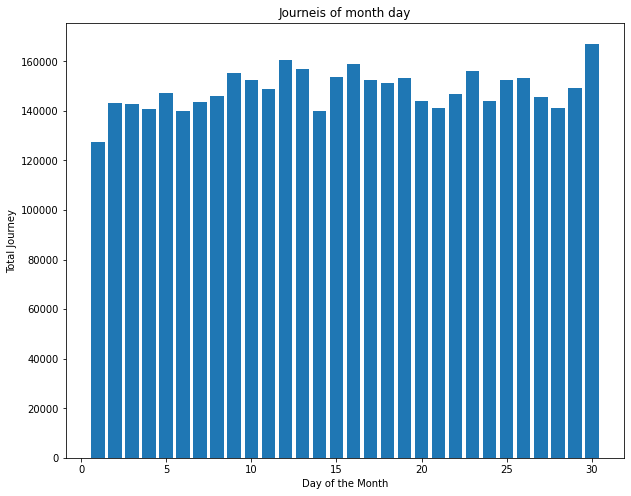

In [ ]:
plt.figure(figsize=(10,8))
plt.hist(df['day'], bins=30, rwidth=0.8, range=(0.5,30.5))
plt.xlabel('Day of the Month')
plt.ylabel('Total Journey')
plt.title('Journeis of month day')

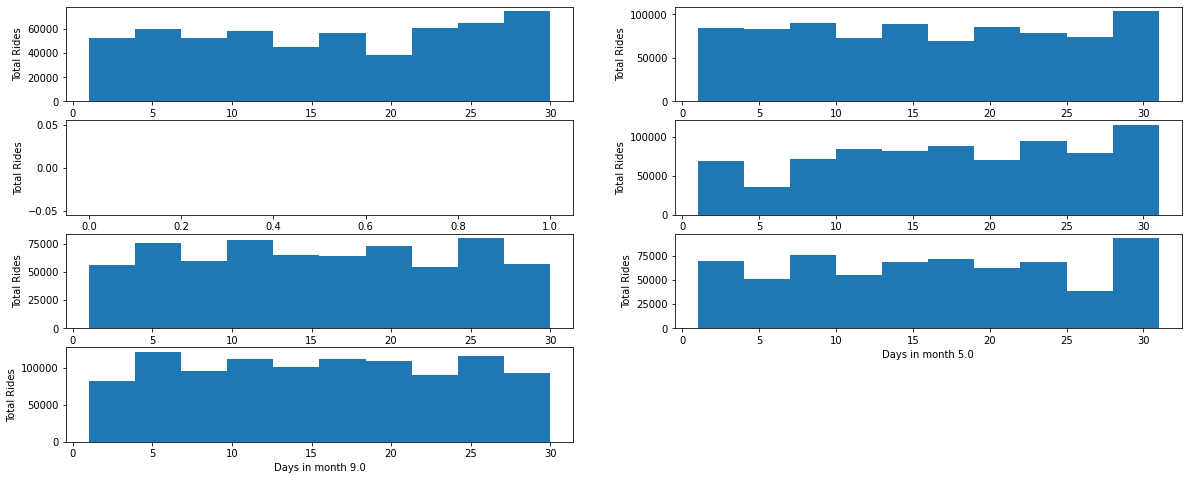

In [ ]:
plt.figure(figsize=(20,8))
for i,month in enumerate(df['month'].unique(),1):
  plt.subplot(4,2,i)
  df_out=df[df['month']==month]
  plt.hist(df_out['day'])
  plt.xlabel('Days in month {}'.format(month))
  plt.ylabel('Total Rides')

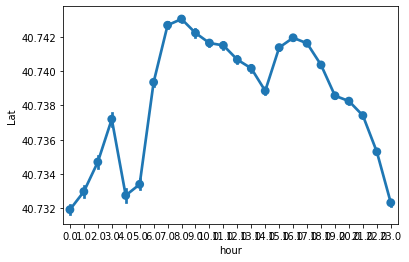

In [ ]:
sns.pointplot(x='hour', y='Lat', data=df)

Text(0.5, 1.0, 'hourofdays vs Latitude of passenger')

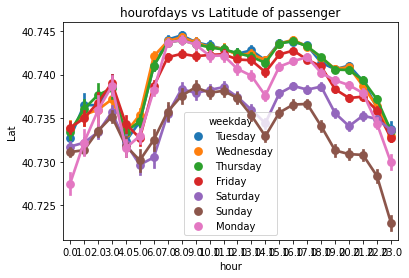

In [ ]:
ax=sns.pointplot(x='hour', y='Lat', data=df, hue='weekday')
ax.set_title('hourofdays vs Latitude of passenger')

In [ ]:
df.head()

,Date/Time,Lat,Lon,Base,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,weekday,day,minute,month,hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,NaN,NaN,NaN,NaN,Tuesday,1.0,11.0,4.0,0.0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,NaN,NaN,NaN,NaN,Tuesday,1.0,17.0,4.0,0.0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,NaN,NaN,NaN,NaN,Tuesday,1.0,21.0,4.0,0.0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,NaN,NaN,NaN,NaN,Tuesday,1.0,28.0,4.0,0.0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,NaN,NaN,NaN,NaN,Tuesday,1.0,33.0,4.0,0.0


In [ ]:
base=df.groupby(['Base', 'month'])['Date/Time'].count().reset_index()
base

,Base,month,Date/Time
0,B02512,4.0,35536
1,B02512,5.0,36765
2,B02512,6.0,32509
3,B02512,7.0,35021
4,B02512,8.0,31472
5,B02512,9.0,34370
6,B02598,4.0,183263
7,B02598,5.0,260549
8,B02598,6.0,242975
9,B02598,7.0,245597


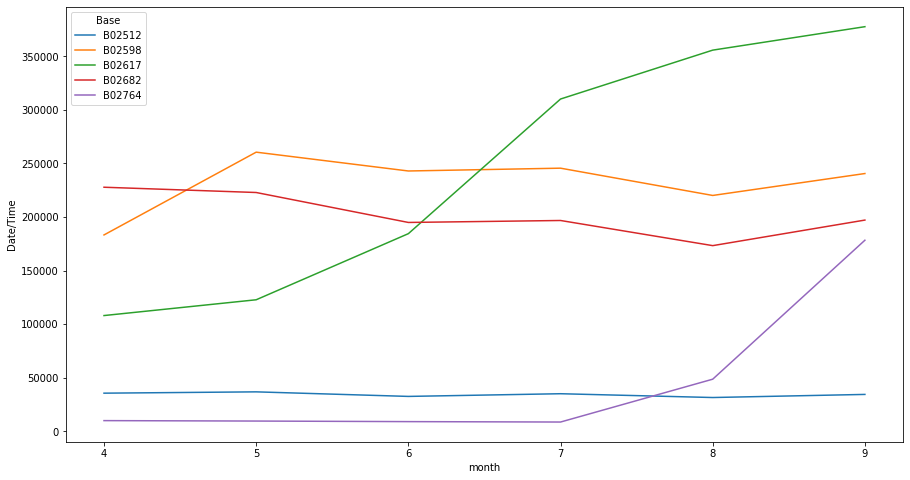

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(x='month', y='Date/Time', hue='Base', data=base)

In [ ]:
def count_rows(rows):
  return len(rows)

In [ ]:
by_cross=df.groupby(['weekday', 'hour']).apply(count_rows)
by_cross

weekday    hour
Friday     0.0     13716
           1.0      8163
           2.0      5350
           3.0      6930
           4.0      8806
                   ...  
Wednesday  19.0    47017
           20.0    47772
           21.0    44553
           22.0    32868
           23.0    18146
Length: 168, dtype: int64

In [ ]:
pivot=by_cross.unstack()
pivot

hour,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
weekday,,,,,,,,,,,,,,,,,,,,,
Friday,13716,8163,5350,6930,8806,13450,23412,32061,31509,25230,...,36206,43673,48169,51961,54762,49595,43542,48323,49409,41260
Monday,6436,3737,2938,6232,9640,15032,23746,31159,29265,22197,...,28157,32744,38770,42023,37000,34159,32849,28925,20158,11811
Saturday,27633,19189,12710,9542,6846,7084,8579,11014,14411,17669,...,31418,38769,43512,42844,45883,41098,38714,43826,47951,43174
Sunday,32877,23015,15436,10597,6374,6169,6596,8728,12128,16401,...,28151,31112,33038,31521,28291,25948,25076,23967,19566,12166
Thursday,9293,5290,3719,5637,8505,14169,27065,37038,35431,27812,...,36699,44442,50560,56704,55825,51907,51990,51953,44194,27764
Tuesday,6237,3509,2571,4494,7548,14241,26872,36599,33934,25023,...,34846,41338,48667,55500,50186,44789,44661,39913,27712,14869
Wednesday,7644,4324,3141,4855,7511,13794,26943,36495,33826,25635,...,35148,43388,50684,55637,52732,47017,47772,44553,32868,18146


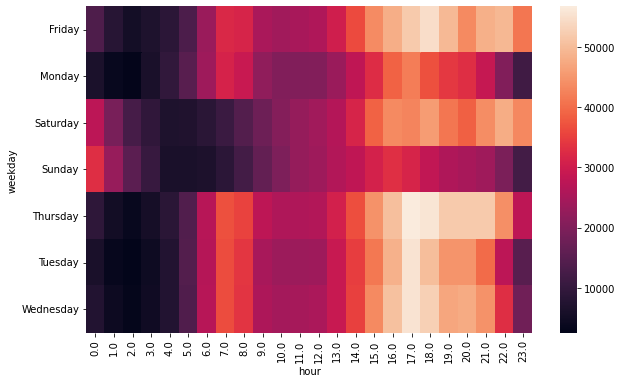

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(pivot)

In [ ]:
def heatmap(col1, col2):
  by_cross=df.groupby([col1, col2]).apply(count_rows)
  pivot=by_cross.unstack()
  plt.figure(figsize=(10,6))
  return sns.heatmap(pivot)

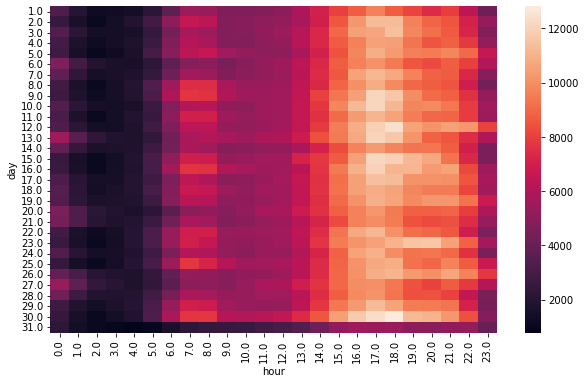

In [ ]:
heatmap('day','hour')

(40.5, 41.0)

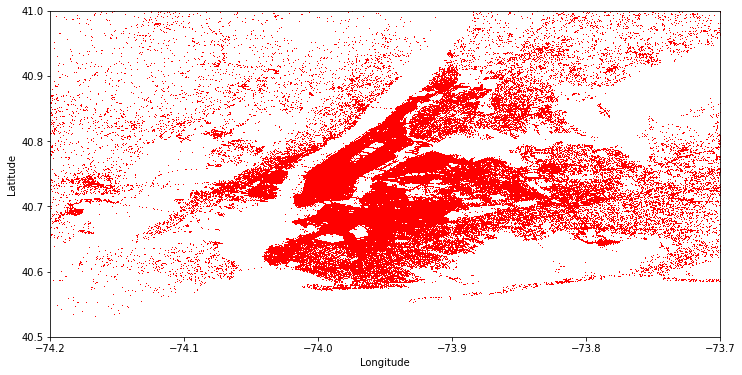

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df['Lon'], df['Lat'], 'r+', ms=0.5)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.xlim(-74.2, -73.7)
plt.ylim(40.5, 41)

In [ ]:
df_out=df[df['weekday']=='Sunday']

In [ ]:
df_out.shape

(490180, 13)

In [ ]:
df_out.head()

,Date/Time,Lat,Lon,Base,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,weekday,day,minute,month,hour
6965,2014-04-06 00:00:00,40.6547,-74.3033,B02512,NaN,NaN,NaN,NaN,Sunday,6.0,0.0,4.0,0.0
6966,2014-04-06 00:00:00,40.7356,-74.0006,B02512,NaN,NaN,NaN,NaN,Sunday,6.0,0.0,4.0,0.0
6967,2014-04-06 00:00:00,40.7421,-74.0041,B02512,NaN,NaN,NaN,NaN,Sunday,6.0,0.0,4.0,0.0
6968,2014-04-06 00:00:00,40.7401,-74.0053,B02512,NaN,NaN,NaN,NaN,Sunday,6.0,0.0,4.0,0.0
6969,2014-04-06 00:01:00,40.7368,-73.9877,B02512,NaN,NaN,NaN,NaN,Sunday,6.0,1.0,4.0,0.0


In [ ]:
rush=df_out.groupby(['Lat','Lon'])['weekday'].count().reset_index()
rush

,Lat,Lon,weekday
0,39.9374,-74.0722,1
1,39.9378,-74.0721,1
2,39.9384,-74.0742,1
3,39.9385,-74.0734,1
4,39.9415,-74.0736,1
...,...,...,...
209225,41.3141,-74.1249,1
209226,41.3180,-74.1298,1
209227,41.3195,-73.6905,1
209228,41.3197,-73.6903,1


In [ ]:
rush.columns=['Lat', 'Lon','no of trips']
rush

,Lat,Lon,no of trips
0,39.9374,-74.0722,1
1,39.9378,-74.0721,1
2,39.9384,-74.0742,1
3,39.9385,-74.0734,1
4,39.9415,-74.0736,1
...,...,...,...
209225,41.3141,-74.1249,1
209226,41.3180,-74.1298,1
209227,41.3195,-73.6905,1
209228,41.3197,-73.6903,1


In [ ]:
# !pip install folium

In [ ]:
from folium.plugins import HeatMap

In [ ]:
import folium

In [ ]:
basemap=folium.Map()
basemap

In [ ]:
import sys
print(sys.getrecursionlimit())

1500


In [ ]:
import sys
sys.setrecursionlimit(1500)

In [ ]:
HeatMap(rush, max_zoom=6,radius=15).add_to(basemap)
basemap

RecursionError: ignored

In [ ]:
def plot(df,day):
  basemap=folium.Map()
  df_out=df[df['weekday']==day]
  HeatMap(df_out.groupby(['Lat','Lon'])['weekday'].count().reset_index()).add_to(basemap)
  return basemap


In [ ]:
plot(df,'Saturday')

In [ ]:
uber_15=pd.read_csv(r'/content/drive/MyDrive/uber-pickups-in-new-york-city/uber-raw-data-janjune-15.csv')

In [ ]:
uber_15.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,141
1,B02617,2015-05-17 09:47:00,B02617,65
2,B02617,2015-05-17 09:47:00,B02617,100
3,B02617,2015-05-17 09:47:00,B02774,80
4,B02617,2015-05-17 09:47:00,B02617,90


In [ ]:
uber_15.dtypes

Dispatching_base_num    object
Pickup_date             object
Affiliated_base_num     object
locationID               int64
dtype: object

In [ ]:
uber_15['Pickup_date']=pd.to_datetime(uber_15['Pickup_date'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
uber_15.dtypes

Dispatching_base_num            object
Pickup_date             datetime64[ns]
Affiliated_base_num             object
locationID                       int64
dtype: object

In [ ]:
uber_15['weekday']=uber_15['Pickup_date'].dt.day_name()
uber_15['day']=uber_15['Pickup_date'].dt.day
uber_15['minute']=uber_15['Pickup_date'].dt.minute
uber_15['month']=uber_15['Pickup_date'].dt.month
uber_15['hour']=uber_15['Pickup_date'].dt.hour

In [ ]:
uber_15.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,weekday,day,minute,month,hour
0,B02617,2015-05-17 09:47:00,B02617,141,Sunday,17,47,5,9
1,B02617,2015-05-17 09:47:00,B02617,65,Sunday,17,47,5,9
2,B02617,2015-05-17 09:47:00,B02617,100,Sunday,17,47,5,9
3,B02617,2015-05-17 09:47:00,B02774,80,Sunday,17,47,5,9
4,B02617,2015-05-17 09:47:00,B02617,90,Sunday,17,47,5,9


In [ ]:
px.bar(x=uber_15['month'].value_counts().index,
       y=uber_15['month'].value_counts())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



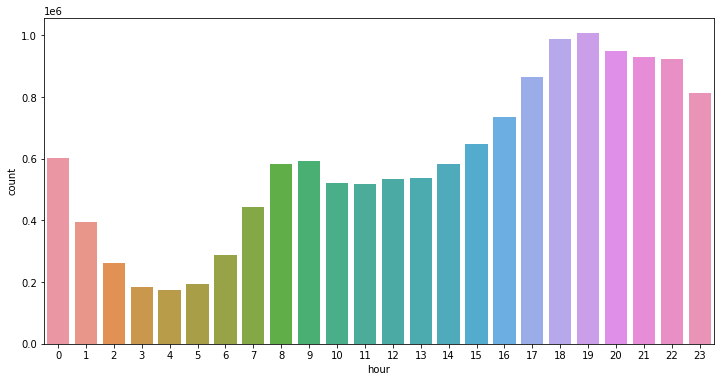

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(uber_15['hour'])

In [ ]:
summary=uber_15.groupby(['weekday', 'hour'])['Pickup_date'].count().reset_index()
summary.head()

,weekday,hour,Pickup_date
0,Friday,0,85939
1,Friday,1,46616
2,Friday,2,28102
3,Friday,3,19518
4,Friday,4,23575


In [ ]:
# summary=uber_15.groupby(['weekday','hour'])['Pickup_date'].count().reset_index


In [ ]:
# summary.head()

In [ ]:
summary.columns=['weekday', 'hour', 'counts']
# summary.head()

In [ ]:
summary.head()

,weekday,hour,counts
0,Friday,0,85939
1,Friday,1,46616
2,Friday,2,28102
3,Friday,3,19518
4,Friday,4,23575


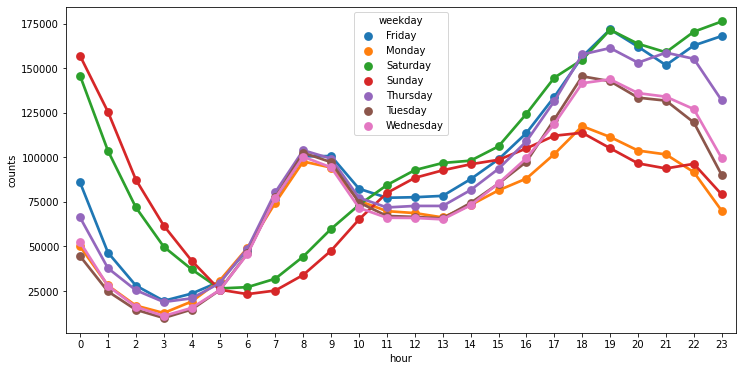

In [ ]:
plt.figure(figsize=(12,6))
sns.pointplot(x='hour', y='counts', hue='weekday', data=summary)

In [ ]:
uber_foil=pd.read_csv(r'/content/drive/MyDrive/uber-pickups-in-new-york-city/Uber-Jan-Feb-FOIL.csv')

In [ ]:
uber_foil

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537
...,...,...,...,...
349,B02764,2/28/2015,3952,39812
350,B02617,2/28/2015,1372,14022
351,B02682,2/28/2015,1386,14472
352,B02512,2/28/2015,230,1803


In [ ]:
uber_foil.head()

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537


In [ ]:
uber_foil.dtypes

dispatching_base_number    object
date                       object
active_vehicles             int64
trips                       int64
dtype: object

In [ ]:
uber_foil['dispatching_base_number'].unique()

array(['B02512', 'B02765', 'B02764', 'B02682', 'B02617', 'B02598'],
      dtype=object)

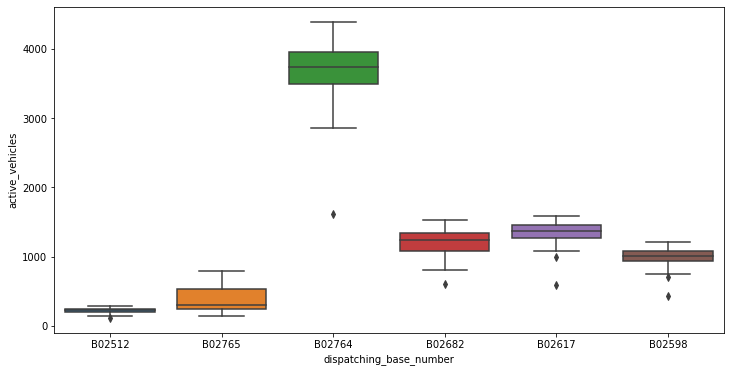

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='dispatching_base_number', y='active_vehicles', data=uber_foil)

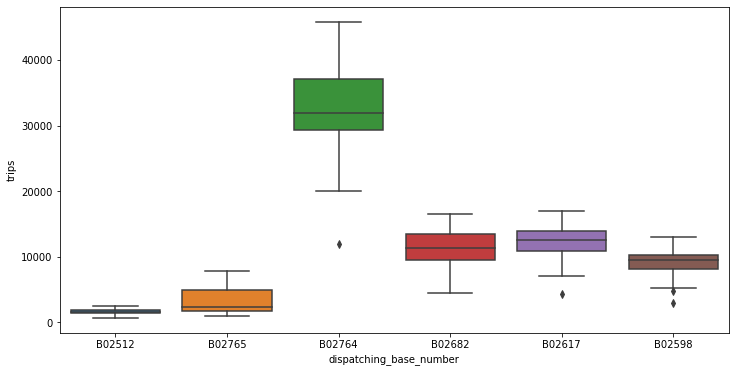

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='dispatching_base_number', y='trips', data=uber_foil)

In [ ]:
uber_foil['trips/vehicle']=uber_foil['trips']/uber_foil['active_vehicles']

In [ ]:
uber_foil.head()

,dispatching_base_number,date,active_vehicles,trips,trips/vehicle
0,B02512,1/1/2015,190,1132,5.957895
1,B02765,1/1/2015,225,1765,7.844444
2,B02764,1/1/2015,3427,29421,8.585060
3,B02682,1/1/2015,945,7679,8.125926
4,B02617,1/1/2015,1228,9537,7.766287


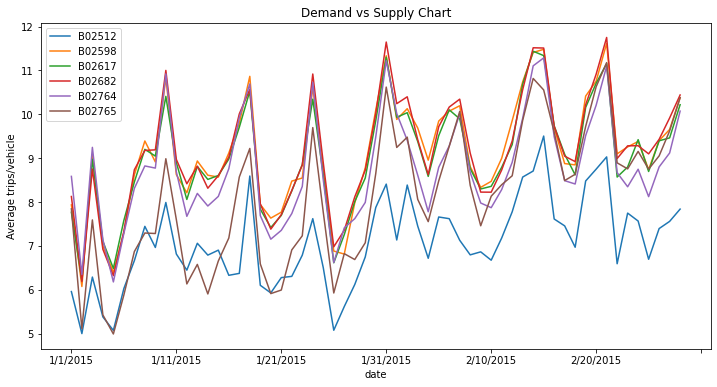

In [ ]:
plt.figure(figsize=(12,6))
uber_foil.set_index('date').groupby(['dispatching_base_number'])['trips/vehicle'].plot()
plt.ylabel('Average trips/vehicle')
plt.title('Demand vs Supply Chart')
plt.legend()